In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [30]:
os.getcwd()

'e:\\subjects\\parallel_computing\\final_project\\test'

In [51]:
df = pd.read_csv('../data/output/mul_mat_times.csv')
df.head()

,number_of_computed,matmul_mono,broadcast_time,common_time,dns_time
0,3000x1024x1024,12.011,12.417,4.300,1.927
1,3333x768x768,7.642,6.346,1.850,1.224
2,490x64x64,0.000,0.000,0.000,0.000
3,200x128x128,0.000,0.000,0.000,0.000
4,500x256x256,0.026,0.006,0.009,0.000


In [49]:
n = df['number_of_computed'].values
times_mono = []
times_board_cast = []
times_cannon = []
times_dsn = []
# sorted(n)
n = np.array([i[0] * i[1] * i[2] for i in [list(map(int, x.split('x'))) for x in df['number_of_computed'].values]])
y = sorted(set(n))

for i in y:
    times_mono.append(df['matmul_mono'][n==i].mean())
    times_board_cast.append(df['broadcast_time'][n==i].mean())
    times_cannon.append(df['common_time'][n==i].mean())
    times_dsn.append(df['dns_time'][n==i].mean())


Text(0, 0.5, 'Mean time (seconds)')

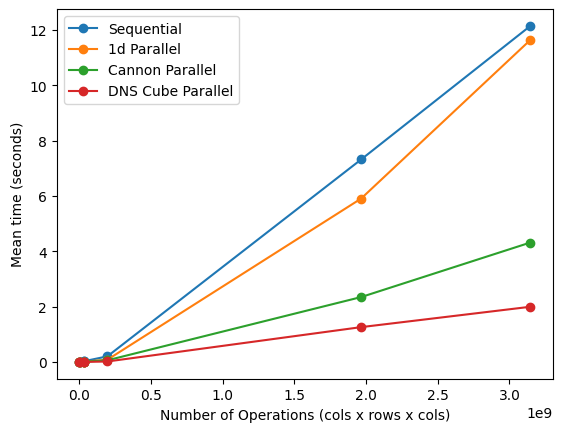

In [50]:
plt.plot(y, times_mono, label='Sequential', marker='o')
plt.plot(y, times_board_cast, label='1d Parallel', marker='o')
plt.plot(y, times_cannon, label='Cannon Parallel', marker='o')
plt.plot(y, times_dsn, label='DNS Cube Parallel', marker='o')

plt.legend()
plt.xlabel('Number of Operations (cols x rows x cols)')
plt.ylabel('Mean time (seconds)')